# Australian Land Animals data gathering

## Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import re

## Edit when done (API and initial file reading)

In [ ]:
# IUCN API access
api_key = '3wdgbYyTa5qtzhXZxq6ZD3KWci8N2E3LgbFL' # Personal API key, hide later

# get data
marsupials_dataframe = pd.read_csv('taxonomy.csv')
marsupials_dataframe.head(10)

,internalTaxonId,scientificName,kingdomName,phylumName,className,orderName,familyName,genusName,speciesName,infraType,infraName,infraAuthority,subpopulationName,authority,taxonomicNotes
0,3339,Burramys parvus,ANIMALIA,CHORDATA,MAMMALIA,DIPROTODONTIA,BURRAMYIDAE,Burramys,parvus,NaN,NaN,NaN,NaN,"Broom, 1896",NaN
1,40540,Sarcophilus harrisii,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Sarcophilus,harrisii,NaN,NaN,NaN,NaN,"(Boitard, 1841)",<em>Sarcophilus laniarius</em> has also been u...
2,40527,Dasykaluta rosamondae,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Dasykaluta,rosamondae,NaN,NaN,NaN,NaN,"(Ride, 1964)",NaN
3,1581,Antechinomys laniger,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Antechinomys,laniger,NaN,NaN,NaN,NaN,"(Gould, 1856)",<p>Two subspecies or ‘forms’ (originally descr...
4,40531,Ningaui yvonneae,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Ningaui,yvonneae,NaN,NaN,NaN,NaN,"Kitchener, Stoddart &amp; Henry, 1983",NaN
5,40529,Ningaui ridei,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Ningaui,ridei,NaN,NaN,NaN,NaN,"Archer, 1975",NaN
6,40530,Ningaui timealeyi,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Ningaui,timealeyi,NaN,NaN,NaN,NaN,"Archer, 1975",NaN
7,6265,Dasyuroides byrnei,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Dasyuroides,byrnei,NaN,NaN,NaN,NaN,"Spencer, 1896",NaN
8,16888,Phascogale calura,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Phascogale,calura,NaN,NaN,NaN,NaN,"Gould, 1844",NaN
9,16889,Phascogale pirata,ANIMALIA,CHORDATA,MAMMALIA,DASYUROMORPHIA,DASYURIDAE,Phascogale,pirata,NaN,NaN,NaN,NaN,"(Thomas, 1904)",<em>Phascogale pirata</em> is considered a sub...


The data shows a id, scientific name, kingdom name, and etc. Which are basic details of an animal

We need
- Internal taxon id for combining with IUCN data
- Scientific name is for combining with ATLA data (No API req, use galah-python library)

## Simple EDA

In [ ]:
# Kingdom, phylum, and class are same for all animals. since we are referring to animals with a spine (vertebrae) and it includes all mammals, and marsupials are a type of mammals that raise newborns in an external pouch
count = marsupials_dataframe['orderName'].value_counts()
proportion = marsupials_dataframe['orderName'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
proportion_and_count = pd.concat([count,proportion],axis = 1,keys=['count','percentage'])
proportion_and_count

NameError: name 'marsupials_dataframe' is not defined

Marsupials are divided in 4 orders, carnivorous (Dasyuromorphia), herbivore/insectivore (Diprotodontia), mouse-like (Peramelemorphia). and moles(notoryctemorphia) . In Australia, the 2 prominent classes of marsupials are Diprotodontia and Dasyuromorphia. The famous animals such as Koala and Kangaroo are Diprotodontia. The tasmanian devil is a Dasyuromorphia

Lets see the family and genus

In [ ]:
count_f = marsupials_dataframe['familyName'].value_counts()
proportion_f = marsupials_dataframe['familyName'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
proportion_and_count_f = pd.concat([count_f,proportion_f],axis = 1,keys=['count','percentage'])
proportion_and_count_f.head(10)

NameError: name 'marsupials_dataframe' is not defined

In [ ]:
count_g = marsupials_dataframe['genusName'].value_counts()
proportion_g = marsupials_dataframe['genusName'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
proportion_and_count_g = pd.concat([count,proportion],axis = 1,keys=['count','percentage'])
proportion_and_count_g.head(10)

To explain, a Family is like a big branch of a family tree that shares the same species, for example, the family MACROPODIDAE contains kangaroos and wallabies, and the genus macropus only consists of kangaroos.

In [ ]:
# Lets aggregate the order - family and family - species.
# order - family aggregation
grouped_df_1 = marsupials_dataframe[['orderName','familyName']]
grouped_df_1 = grouped_df_1.groupby(['orderName'])['familyName'].unique().reset_index()
grouped_df_1['familyName'] = grouped_df_1['familyName'].apply(lambda x:len(x))
grouped_df_1

Diprotodontia marsupials consists of 11 families, which is the most comprehensive order among the 4 in Australia

In [ ]:
grouped_df_2 = marsupials_dataframe[['familyName','genusName']]
grouped_df_2 = grouped_df_2.groupby(['familyName'])['genusName'].unique().reset_index()
grouped_df_2['genusName'] = grouped_df_2['genusName'].apply(lambda x:len(x))
grouped_df_2

## Combining w/ IUCN data

### Install galah

In [2]:
pip install galah-python

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.9/175.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.0 MB/s eta 0:00:00
  Created wheel for shutils: filename=shutils-0.1.0-py3-none-any.whl size=3273 sha256=c945eecd2a37ff325a6e129498db002b2e6ed5ca106959d77ac425fbc274d72b
  Stored in directory: /root/.cache/pip/wheels/62/63/04/81e549bdb44792d8b62938cffc3bd00a34addabe1da3693db8
  Created wheel for unittest2py3k: filename=unittest2py3k-0.5.1-py3-none-any.whl size=64734 sha256=5c64d55b9437e43735df06cf12dae889624b1f8f2fedaa943eb6b9033eff3563
  Stored in directory: /root/.cache/pip/wheels/23/db/b5/803b9a7de0758c9b5185a0993fdc55e1e339493a65ff03dee6
Successfully built shutils unittest2py3k


In [3]:
import galah

### find the common name of each species

In [4]:
# galah configuration
# compile all scientific name into a list
science_n_list = list(marsupials_dataframe['scientificName'])

# Initialise an empty dictionary
common_names = {}

for i in science_n_list:
  try :
    dataframe = galah.atlas_species(scientific_name ={"kingdom": ["Animalia"],"scientificName": [i]})
    common_names[i] = dataframe['Vernacular Name'].iloc[0]
  except:
    common_names[i] = 'no common name'

NameError: name 'marsupials_dataframe' is not defined

In [ ]:
common_names

{'Burramys parvus': 'Mountain Pygmy-possum',
 'Sarcophilus harrisii': 'Tasmanian Devil',
 'Dasykaluta rosamondae': 'Little Red Antechinus',
 'Antechinomys laniger': 'Kultarr',
 'Ningaui yvonneae': 'Southern Ningaui',
 'Ningaui ridei': 'Wongai Ningaui',
 'Ningaui timealeyi': 'Pilbara Ningaui',
 'Dasyuroides byrnei': 'Kowari',
 'Phascogale calura': 'Red-tailed Phascogale',
 'Phascogale pirata': 'Northern Brush-tailed Phascogale',
 'Parantechinus apicalis': 'Dibbler',
 'Planigale maculata': 'Common Planigale',
 'Planigale tenuirostris': 'Narrow-nosed Planigale',
 'Planigale gilesi': 'Paucident Planigale',
 'Planigale ingrami': 'Long-tailed Planigale',
 'Pseudantechinus bilarni': 'Northern Dibbler',
 'Pseudantechinus woolleyae': "Woolley's Pseudantechinus",
 'Pseudantechinus mimulus': 'Carpentarian Pseudantechinus',
 'Pseudantechinus macdonnellensis': 'Fat-tailed Pseudantechinus',
 'Pseudantechinus ningbing': 'Ningbing Pseudantechinus',
 'Pseudantechinus roryi': 'Fat-tailed Pseudantechinus

In [ ]:
unknown_names = []
for i in common_names.keys():
  if common_names[i] == 'no common name':
    unknown_names.append(i)

unknown_names

['Bettongia pusilla']

There are a unknown name, i need to edit manually. Google search calls the *Bettongia pusilla* the Nullarbor dwarf bettong. I will update manually

In [ ]:
common_names['Bettongia pusilla'] = 'Nullarbor Dwarf Bettong'
# Check again
unknown_names = []
for i in common_names.keys():
  if common_names[i] == 'no common name':
    unknown_names.append(i)

unknown_names

[]

No more unknown names, next i will create a dataframe that will be a core for the whole project

In [ ]:
# first get id from the table derived from IUCN red list
left_table = marsupials_dataframe[['internalTaxonId','scientificName']]
right_table = pd.DataFrame.from_dict(common_names, orient = 'index').reset_index()
right_table.columns = ['scientificName','commonName']

# Merge both tables
marsupial_table = left_table.merge(right_table,how = 'inner',on ='scientificName')
marsupial_table

# Save to CSV
marsupial_table.to_csv('Marsupial_table.csv')

### Checkpoint

In [5]:
# Checkpoint
marsupial_table = pd.read_csv('Marsupial_table.csv')
marsupial_table = marsupial_table.drop(columns='Unnamed: 0')
marsupial_table

,internalTaxonId,scientificName,commonName
0,3339,Burramys parvus,Mountain Pygmy-possum
1,40540,Sarcophilus harrisii,Tasmanian Devil
2,40527,Dasykaluta rosamondae,Little Red Antechinus
3,1581,Antechinomys laniger,Kultarr
4,40531,Ningaui yvonneae,Southern Ningaui
...,...,...,...
142,16892,Phascolarctos cinereus,Koala
143,18102,Potorous longipes,Long-footed Potoroo
144,41511,Potorous tridactylus,Long-nosed Potoroo
145,40579,Petauroides volans,Southern Greater Glider


In [7]:
# Integrate with IUCN
api_key = '3wdgbYyTa5qtzhXZxq6ZD3KWci8N2E3LgbFL'

# Initialize JSON list to store assessments
name_list = marsupial_table['scientificName'].to_list()
name_list = [x.split(' ') for x in name_list]
name_list

## Get latest assessment ID
json_list = []
## Get delayed response in order to not get terminated by API
for i in range(len(name_list)):
  count = 0
  a = name_list[i][0]
  b = name_list[i][1]
  url = f'https://api.iucnredlist.org/api/v4/taxa/scientific_name?genus_name={a}&species_name={b}'

  headers = {
    'accept': 'application/json',
    'Authorization': '3wdgbYyTa5qtzhXZxq6ZD3KWci8N2E3LgbFL'
  }
  response = requests.get(url, headers=headers)
  json_list.append(response.json())
  count += 1
  if count == 5:
    time.sleep(60)
    count = 0

In [8]:
# Results of API data gathering, assessments, we only want the asssemsent IDs of the latest
json_list

[{'taxon': {'sis_id': 3339,
   'scientific_name': 'Burramys parvus',
   'species_taxa': [],
   'subpopulation_taxa': [],
   'infrarank_taxa': [],
   'kingdom_name': 'ANIMALIA',
   'phylum_name': 'CHORDATA',
   'class_name': 'MAMMALIA',
   'order_name': 'DIPROTODONTIA',
   'family_name': 'BURRAMYIDAE',
   'genus_name': 'Burramys',
   'species_name': 'parvus',
   'subpopulation_name': None,
   'infra_name': None,
   'authority': 'Broom, 1896',
   'species': True,
   'subpopulation': False,
   'infrarank': False,
   'ssc_groups': [{'name': 'IUCN SSC Australasian Marsupial and Monotreme Specialist Group',
     'url': 'https://www.iucn.org/commissions/ssc-groups/mammals/specialist-groups-a-e/australasian-marsupial-and-monotreme',
     'description': 'Co-Chairs: John Woinarski (email: John.Woinarski@cdu.edu.au) and Diana Fisher (email: d.fisher@uq.edu.au)\nRed List Authority Coordinator: Chris Johnson (email: c.n.johnson@utas.edu.au)'}],
   'common_names': [{'main': False,
     'name': "Broo

In [9]:
# Save it to a file
with open('species_info.json', 'w') as f:
    json.dump(json_list, f, indent=4)

# open the JSON file
with open ('species_info.json', 'r') as f:
  json_list = json.load(f)

# Get the latest assesment IDs, we can see the latest = true
ids_list = []

# Iterate on the JSON list
for i in range(len(json_list)):
    data = json_list[i]
    # Initialize an empty variable first
    latest_assesment = None
    # This reads the JSON data
    for assessment in data['assessments']:
      latest_assesment = assessment
      if assessment['latest'] == True:
        ids_list.append(latest_assesment['assessment_id'])
        break





### Get the threat info

In [10]:
all_list = []
for id in ids_list:
  url = f'https://api.iucnredlist.org/api/v4/assessment/{id}'
  headers = {
    'accept': 'application/json',
    'Authorization': '3wdgbYyTa5qtzhXZxq6ZD3KWci8N2E3LgbFL'
     }

  response = requests.get(url, headers=headers)
  a = response.json()

  print(a['threats'])
  threat_list = []
  for i in range(len(a['threats'])):
   if a['threats'][i]['timing'] == 'Ongoing':
     threat_list.append(a['threats'][i]['description']['en'])
   else:
     continue
  all_list.append(threat_list)



[{'scope': None, 'timing': 'Ongoing', 'internationalTrade': None, 'score': 'Low Impact: 3', 'severity': None, 'ancestry': None, 'virus': None, 'ias': None, 'text': None, 'description': {'en': 'Roads & railroads'}, 'code': '4_1'}, {'scope': None, 'timing': 'Ongoing', 'internationalTrade': None, 'score': 'Low Impact: 3', 'severity': None, 'ancestry': None, 'virus': None, 'ias': None, 'text': None, 'description': {'en': 'Habitat shifting & alteration'}, 'code': '11_1'}, {'scope': None, 'timing': 'Ongoing', 'internationalTrade': None, 'score': 'Low Impact: 3', 'severity': None, 'ancestry': None, 'virus': None, 'ias': None, 'text': None, 'description': {'en': 'Increase in fire frequency/intensity'}, 'code': '7_1_1'}, {'scope': None, 'timing': 'Ongoing', 'internationalTrade': None, 'score': 'Low Impact: 3', 'severity': None, 'ancestry': None, 'virus': None, 'ias': None, 'text': None, 'description': {'en': 'Tourism & recreation areas'}, 'code': '1_3'}, {'scope': None, 'timing': 'Ongoing', 'in

In [11]:
all_list

[['Roads & railroads',
  'Habitat shifting & alteration',
  'Increase in fire frequency/intensity',
  'Tourism & recreation areas',
  'Dams (size unknown)',
  'Named species',
  'Named species'],
 ['Problematic native species/diseases', 'Persecution/control'],
 [],
 ['Scale Unknown/Unrecorded',
  'Agro-industry grazing, ranching or farming',
  'Increase in fire frequency/intensity',
  'Named species'],
 [],
 [],
 [],
 ['Scale Unknown/Unrecorded', 'Habitat shifting & alteration'],
 ['Increase in fire frequency/intensity', 'Named species'],
 ['Scale Unknown/Unrecorded',
  'Agro-industry plantations',
  'Trend Unknown/Unrecorded',
  'Named species'],
 ['Trend Unknown/Unrecorded', 'Named species'],
 [],
 [],
 [],
 [],
 ['Trend Unknown/Unrecorded', 'Named species'],
 [],
 ['Scale Unknown/Unrecorded',
  'Trend Unknown/Unrecorded',
  'Unspecified species',
  'Named species'],
 [],
 [],
 [],
 ['Named species',
  'Increase in fire frequency/intensity',
  'Agro-industry grazing, ranching or farm

This is the list we want, This way we can find out the threats of the species

In [12]:
# Now we put in the dataframe
marsupial_table['threat'] = all_list
marsupial_table

,internalTaxonId,scientificName,commonName,threat
0,3339,Burramys parvus,Mountain Pygmy-possum,"[Roads & railroads, Habitat shifting & alterat..."
1,40540,Sarcophilus harrisii,Tasmanian Devil,"[Problematic native species/diseases, Persecut..."
2,40527,Dasykaluta rosamondae,Little Red Antechinus,[]
3,1581,Antechinomys laniger,Kultarr,"[Scale Unknown/Unrecorded, Agro-industry grazi..."
4,40531,Ningaui yvonneae,Southern Ningaui,[]
...,...,...,...,...
142,16892,Phascolarctos cinereus,Koala,"[Increase in fire frequency/intensity, Roads &..."
143,18102,Potorous longipes,Long-footed Potoroo,"[Named species, Trend Unknown/Unrecorded, Unin..."
144,41511,Potorous tridactylus,Long-nosed Potoroo,"[Increase in fire frequency/intensity, Named s..."
145,40579,Petauroides volans,Southern Greater Glider,"[Increase in fire frequency/intensity, Housing..."


In [13]:
# we want to see the endangered status
url = f'https://api.iucnredlist.org/api/v4/red_list_categories'
headers = {
    'accept': 'application/json',
    'Authorization': '3wdgbYyTa5qtzhXZxq6ZD3KWci8N2E3LgbFL'
     }

response = requests.get(url, headers=headers)
rlstatus_data = response.json()

In [17]:
marsupial_table['iucn_id'] = ids_list
marsupial_table

,internalTaxonId,scientificName,commonName,threat,iucn_id
0,3339,Burramys parvus,Mountain Pygmy-possum,"[Roads & railroads, Habitat shifting & alterat...",9775825
1,40540,Sarcophilus harrisii,Tasmanian Devil,"[Problematic native species/diseases, Persecut...",10331066
2,40527,Dasykaluta rosamondae,Little Red Antechinus,[],21943336
3,1581,Antechinomys laniger,Kultarr,"[Scale Unknown/Unrecorded, Agro-industry grazi...",21943713
4,40531,Ningaui yvonneae,Southern Ningaui,[],21943904
...,...,...,...,...,...
142,16892,Phascolarctos cinereus,Koala,"[Increase in fire frequency/intensity, Roads &...",166496779
143,18102,Potorous longipes,Long-footed Potoroo,"[Named species, Trend Unknown/Unrecorded, Unin...",166498043
144,41511,Potorous tridactylus,Long-nosed Potoroo,"[Increase in fire frequency/intensity, Named s...",166499137
145,40579,Petauroides volans,Southern Greater Glider,"[Increase in fire frequency/intensity, Housing...",166500472


In [18]:
assessment_list = []
for i in range(len(marsupial_table)):
  url = f"https://api.iucnredlist.org/api/v4/assessment/{marsupial_table['iucn_id'][i]}"
  headers = {
    'accept': 'application/json',
    'Authorization': '3wdgbYyTa5qtzhXZxq6ZD3KWci8N2E3LgbFL'
     }
  response = requests.get(url, headers=headers)
  print(response)
  Item = response.json()
  assessment_list.append(Item['red_list_category']['description']['en'])



<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

In [19]:
marsupial_table['iucn_status'] = assessment_list
marsupial_table

,internalTaxonId,scientificName,commonName,threat,iucn_id,iucn_status
0,3339,Burramys parvus,Mountain Pygmy-possum,"[Roads & railroads, Habitat shifting & alterat...",9775825,Critically Endangered
1,40540,Sarcophilus harrisii,Tasmanian Devil,"[Problematic native species/diseases, Persecut...",10331066,Endangered
2,40527,Dasykaluta rosamondae,Little Red Antechinus,[],21943336,Least Concern
3,1581,Antechinomys laniger,Kultarr,"[Scale Unknown/Unrecorded, Agro-industry grazi...",21943713,Least Concern
4,40531,Ningaui yvonneae,Southern Ningaui,[],21943904,Least Concern
...,...,...,...,...,...,...
142,16892,Phascolarctos cinereus,Koala,"[Increase in fire frequency/intensity, Roads &...",166496779,Vulnerable
143,18102,Potorous longipes,Long-footed Potoroo,"[Named species, Trend Unknown/Unrecorded, Unin...",166498043,Vulnerable
144,41511,Potorous tridactylus,Long-nosed Potoroo,"[Increase in fire frequency/intensity, Named s...",166499137,Near Threatened
145,40579,Petauroides volans,Southern Greater Glider,"[Increase in fire frequency/intensity, Housing...",166500472,Vulnerable


In [20]:
least_concern = marsupial_table.query('iucn_status == "Least Concern"')
least_concern_no_threat = least_concern[least_concern['threat'].apply(lambda x : len(x) == 0)]
f'all : {len(least_concern)}, with_threat : {len(least_concern_no_threat)}, ratio : {len(least_concern)/len(least_concern_no_threat)}'

'all : 74, with_threat : 61, ratio : 1.2131147540983607'

Even the least concern animals are still facing threats in Australia.

## Checkpoint 2

In [22]:
marsupial_table.to_csv('Marsupial_table.csv')

In [37]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import re
import galah

marsupial_table = pd.read_csv('Marsupial_table.csv')

Check the status

In [39]:
marsupial_table['iucn_status'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

,proportion
iucn_status,
Least Concern,50.3%
Near Threatened,17.7%
Vulnerable,12.9%
Extinct,8.2%
Endangered,6.8%
Critically Endangered,4.1%


Over 50% Marsupials in Australia are least concern. However, there are already a concerning amount of 8% extinct marsupial species in Australia

In [48]:
# get habitats info
habitat_list = []
for item in range(len(marsupial_table)):
  url = f'https://api.iucnredlist.org/api/v4/assessment/{marsupial_table["iucn_id"][item]}'
  headers = {
    'accept': 'application/json',
    'Authorization': '3wdgbYyTa5qtzhXZxq6ZD3KWci8N2E3LgbFL'
     }

  response = requests.get(url, headers=headers)
  a = response.json()

  print(a['habitats'])
  habitats_list = []
  for i in range(len(a['habitats'])):
    habitats_list.append(a['habitats'][i]['description']['en'])
  habitat_list.append(habitats_list)

habitat_list

[{'majorImportance': None, 'season': None, 'suitability': 'Suitable', 'description': {'en': 'Shrubland - Subtropical/Tropical High Altitude'}, 'code': '3_7'}]
[{'majorImportance': None, 'season': None, 'suitability': 'Marginal', 'description': {'en': 'Shrubland - Temperate'}, 'code': '3_4'}, {'majorImportance': None, 'season': None, 'suitability': 'Marginal', 'description': {'en': 'Artificial/Terrestrial - Pastureland'}, 'code': '14_2'}, {'majorImportance': None, 'season': None, 'suitability': 'Marginal', 'description': {'en': 'Introduced vegetation'}, 'code': '16'}, {'majorImportance': None, 'season': None, 'suitability': 'Marginal', 'description': {'en': 'Artificial/Terrestrial - Arable Land'}, 'code': '14_1'}, {'majorImportance': None, 'season': None, 'suitability': 'Suitable', 'description': {'en': 'Forest - Temperate'}, 'code': '1_4'}, {'majorImportance': None, 'season': None, 'suitability': 'Suitable', 'description': {'en': 'Caves and Subterranean Habitats (non-aquatic) - Caves'}

[['Shrubland - Subtropical/Tropical High Altitude'],
 ['Shrubland - Temperate',
  'Artificial/Terrestrial - Pastureland',
  'Introduced vegetation',
  'Artificial/Terrestrial - Arable Land',
  'Forest - Temperate',
  'Caves and Subterranean Habitats (non-aquatic) - Caves',
  'Grassland - Temperate'],
 ['Grassland - Subtropical/Tropical Dry'],
 ['Savanna - Dry',
  'Shrubland - Mediterranean-type Shrubby Vegetation',
  'Shrubland - Subtropical/Tropical Dry',
  'Grassland - Subtropical/Tropical Dry',
  'Desert - Hot',
  'Desert - Temperate'],
 ['Shrubland - Subtropical/Tropical Dry',
  'Grassland - Subtropical/Tropical Dry',
  'Shrubland - Mediterranean-type Shrubby Vegetation'],
 ['Savanna - Dry',
  'Grassland - Subtropical/Tropical Dry',
  'Shrubland - Subtropical/Tropical Dry'],
 ['Grassland - Subtropical/Tropical Dry',
  'Desert - Hot',
  'Rocky areas (eg. inland cliffs, mountain peaks)'],
 ['Desert - Hot', 'Shrubland - Subtropical/Tropical Dry'],
 ['Forest - Subtropical/Tropical Dry'

In [49]:
marsupial_table['habitat'] = habitat_list
marsupial_table

,Unnamed: 0,internalTaxonId,scientificName,commonName,threat,iucn_id,iucn_status,habitat
0,0,3339,Burramys parvus,Mountain Pygmy-possum,"['Roads & railroads', 'Habitat shifting & alte...",9775825,Critically Endangered,[Shrubland - Subtropical/Tropical High Altitude]
1,1,40540,Sarcophilus harrisii,Tasmanian Devil,"['Problematic native species/diseases', 'Perse...",10331066,Endangered,"[Shrubland - Temperate, Artificial/Terrestrial..."
2,2,40527,Dasykaluta rosamondae,Little Red Antechinus,[],21943336,Least Concern,[Grassland - Subtropical/Tropical Dry]
3,3,1581,Antechinomys laniger,Kultarr,"['Scale Unknown/Unrecorded', 'Agro-industry gr...",21943713,Least Concern,"[Savanna - Dry, Shrubland - Mediterranean-type..."
4,4,40531,Ningaui yvonneae,Southern Ningaui,[],21943904,Least Concern,"[Shrubland - Subtropical/Tropical Dry, Grassla..."
...,...,...,...,...,...,...,...,...
142,142,16892,Phascolarctos cinereus,Koala,"['Increase in fire frequency/intensity', 'Road...",166496779,Vulnerable,"[Forest - Subtropical/Tropical Dry, Forest - T..."
143,143,18102,Potorous longipes,Long-footed Potoroo,"['Named species', 'Trend Unknown/Unrecorded', ...",166498043,Vulnerable,"[Forest - Temperate, Shrubland - Temperate]"
144,144,41511,Potorous tridactylus,Long-nosed Potoroo,"['Increase in fire frequency/intensity', 'Name...",166499137,Near Threatened,"[Forest - Temperate, Shrubland - Temperate]"
145,145,40579,Petauroides volans,Southern Greater Glider,"['Increase in fire frequency/intensity', 'Hous...",166500472,Vulnerable,"[Forest - Subtropical/Tropical Dry, Forest - T..."


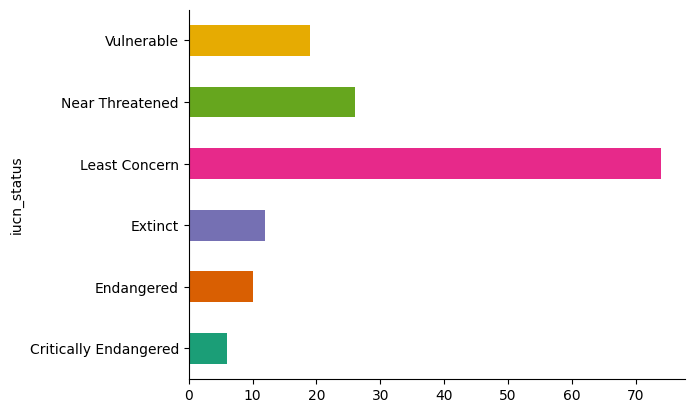

In [50]:
# @title iucn_status

from matplotlib import pyplot as plt
import seaborn as sns
marsupial_table.groupby('iucn_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [51]:
marsupial_table.to_csv('Marsupial_table.csv')